# Analysis of Stack Overflow Survey


## Table of Contents
- [0. Introduction](#intro)
- [1. Business Understanding](#business_understanding)
- [2. Data Understanding](#data_understanding)
- [3. Data Preparation](#data_preparation)
- [4. Modeling](#c)
- [5. Evaluation](#evaluation)
- [6. Deployment](#deployment)


<a id='intro'></a>
## 0. Introduction

This project is an analysis of the Stack Overflow Survey held during multiple years. Main goal of this project is to follow through the complete Cross-Industry Standard Process for Data Mining. 


<a id='business_understanding'></a>
## 1. Business Understanding

In this section we want to understand the problem.  
Questions:  
1. Statistics
    - What is the most popular programming language?
    - What are the highest paid roles?  (here careful with country and experience dependency.
    - How differ coding experience, language preferences, roles, age and salary among available countries.
    - How many people did take part at the survey and what does this say about the popularity of Stack Overflow?

2. Machine Learning
    - Is it possible to predict the career/job satisfaction judging from available data? --> Use data of multiple years?

problematic, because columns change every year:
- How did this change over time?
- Are there improvement in gender equality and representation of minorities over the course of time?



<a id='data_understanding'></a>
## 2. Data Understanding

Interesting columns:
- Years since learning to code
- Years Coding Professionaly
- Databases
- Frameworks, Libraries and Tools
- Programming, Scripting and Markup Languages
- Career Satisfaction / Job Satisfaction
- 

#### Import external libraries

In [81]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

### 2.1 Gather data

#### Read data from csv-file

In [82]:
# Import data from local csv to pandas dataframe

df_2018_survey = pd.read_csv('./Data/developer_survey_2018/survey_results_public.csv')
df_2018_schema = pd.read_csv('./Data/developer_survey_2018/survey_results_schema.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.2. Assess data

After gathering each of the above pieces of data, they are assessed visually and programmatically for quality and tidiness issues. Requirements to be met:

- Quality requirements:
    - Completeness: All necessary records in dataframes, no specific rows, columns or cells missing.
    - Validity: No records available, that do not conform schema.
    - Accuracy: No wrong data, that is valid.
    - Consistency: No data, that is valid and accurate, but referred to in multiple correct ways.
- Tidiniss requirements (as defined by Hadley Wickham):
    - each variable is a column
    - each observation is a row
    - each type of observational unit is a table.

In [45]:
# Number of rows in the dataset
num_rows = df_2020_survey.shape[0] 
print('Rows: ' + str(num_rows))

# Number of columns in the dataset
num_cols = df_2020_survey.shape[1] 
print('Columns: ' + str(num_cols))

Rows: 64461
Columns: 61


In [108]:
# Display all columns for visual analysis
pd.set_option('display.max_columns', None) # show all columns
df_2018_survey.head(n=5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [109]:
# set back to default value
pd.reset_option('max_columns') 

In [73]:
# Function to understand the column name while visually analyzing the dataframe
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    
    desc = list(schema.query('Column == @column_name').QuestionText)[0]

    return desc


In [87]:
# Put name of column here to check the description of the column
get_description('Salary', df_2018_schema)

'What is your current gross salary (before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

### b. Programmatic assessment

In [92]:
# Check datatypes and non-null count of columns in df_twitter_archive_enhanced
df_2018_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


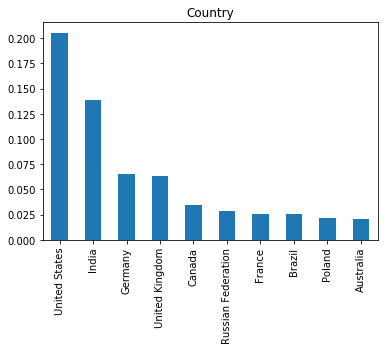

In [89]:
# Where are the participants of the survey from?
country_rows = df_2018_survey.Country.value_counts()

(country_rows[:10]/df_2018_survey.shape[0]).plot(kind="bar");
plt.title("Country");

In [96]:
df_2018_survey.Employment.value_counts()

Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: Employment, dtype: int64

In [97]:
df_2018_survey.FormalEducation.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8951
Associate degree                                                                       2970
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2214
Primary/elementary school                                                              1656
Professional degree (JD, MD, etc.)                                                     1447
I never completed any formal education                                                  700
Name: FormalEducation, dtype: int64

In [98]:
df_2018_survey.CompanySize.value_counts()

20 to 99 employees          16996
100 to 499 employees        14011
10,000 or more employees     9757
10 to 19 employees           8007
1,000 to 4,999 employees     7634
Fewer than 10 employees      7479
500 to 999 employees         4630
5,000 to 9,999 employees     3017
Name: CompanySize, dtype: int64

In [90]:
df_2018_survey.Hobby.value_counts()

Yes    79897
No     18958
Name: Hobby, dtype: int64

In [106]:
# Which columns have less than 30% missing values?
most_missing_cols = set(df_2018_survey.columns[df_2018_survey.isnull().mean() < 0.3])#Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'AIFuture',
 'AdBlocker',
 'AdsAgreeDisagree1',
 'AdsAgreeDisagree2',
 'AdsAgreeDisagree3',
 'CareerSatisfaction',
 'CheckInCode',
 'CompanySize',
 'Country',
 'DevType',
 'Employment',
 'EthicalImplications',
 'EthicsChoice',
 'EthicsReport',
 'Exercise',
 'FormalEducation',
 'Hobby',
 'HopeFiveYears',
 'HoursComputer',
 'HoursOutside',
 'HypotheticalTools1',
 'HypotheticalTools2',
 'HypotheticalTools3',
 'HypotheticalTools4',
 'HypotheticalTools5',
 'IDE',
 'JobSatisfaction',
 'JobSearchStatus',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'LastNewJob',
 'NumberMonitors',
 'OpenSource',
 'OperatingSystem',
 'Respondent',
 'SkipMeals',
 'StackOverflowConsiderMember',
 'StackOverflowHasAccount',
 'StackOverflowJobs',
 'StackOverflowRecommend',
 'StackOverflowVisit',
 'Student',
 'UndergradMajor',
 'VersionControl',
 'WakeTime',
 'YearsCoding',
 'YearsCodingProf'}

In [111]:
#The exact proportion of missing values in the Job Satisfaction column
df_2018_survey.JobSatisfaction.isnull().mean() 

0.2992160234687168

In [ ]:
#df.JobSatisfaction.dropna(inplace=True)
#df = df[df['JobSatisfaction'].isnull()==0]

Idea: 
- Add row with year
- Merge all datasets into one set
- seems like 2020 misses for example WorkRemote

### Findings, which contradict requirements:

##### `df_twitter_archive_enhanced` table

- Validity: Not all tweets are dog ratings, some are retweets. 181 Retweets, identied by values in columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.
- Validity: Not all tweets are dog ratings, some are retweets. Retweets: 78 non-null values in columns `in_reply_to_status_id` and `in_reply_to_user_id`.
- Validity: Not all values in column `rating_denominator`are equal to 10.
- Completeness: Not all rows have a value in either one of the following columns: `doggo`, `floofer`, `pupper`, `puppo`.
- Consistency: Duplicate info in column `text` to columns `rating_numerator`, `rating_denominator`, `name`, `doggo`, `floofer`, `pupper`, `puppo`. 
- Completeness: There are 745 entries 'None' and 55 entries 'a' in the column `name`. 
- Accuracy: Column `timestamp` is not of type datetime.
- Validity: In column `expanded_urls` the urls match mainly `https://twitter.com/dog_rates/status/`, yet there is one example where the url starts with `https://gofundme.com/ydvmve-surgery-for-`.


##### `df_image_predictions` table
- Consistency: Up to three different images with three possible interpretations what is depicted on the image. Ratings of interest always refer to one dog. Not all images depict dogs (regarding the image recognition/prediction table).

#### `df_tweet_api_info`table
- Accuracy: Columns `retweet_count` and `favorite_count` are of type float, where they can only be integers as values.

#### Tidiness Observations:
- Variable `text`contains multiple observational units `rating_numerator`, `rating_denominator`, `name`, `doggo`, `floofer`, `pupper`, `puppo`.
- One variable (dog stage) in four columns in `treatments` table (doggo, floofer, pupper and puppo) of type categorical. 
- One observational unit in in three tables, `df_twitter_archive_enhanced`, `df_image_predictions`and `df_tweet_api_info`, different amount of rows.

<a id='data_preparation'></a>
## 3. Data Preparation

...

### 3.2. Clean data

### Issue 1:
#### Observe:
- Validity: Not all tweets are dog ratings, some are retweets. 181 Retweets, identied by values in columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

#### Define:
- Drop rows, which can be identified as retweets by non-null values in columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. Furthermore drop columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`, as not necessary anymore.

#### Code:

#### Test:

<a id='modeling'></a>
## 4. Modeling

...

<a id='evaluation'></a>
## 5. Evaluation

...

<a id='deployment'></a>
## 6. Deployment

...